In [2]:
#NNQ - Building a Neural Network from Scratch with only numpy, calculus and matrix multiplication 

#import standard ML libraries/tools
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#import NNQ (I made these) modules
from network import Network
from layers import Layer, Dropout
from costs import SquaredError,CrossEntropy
from activ import ReLU, SoftMax, Sigmoid

In [3]:
#create network with desired structure
net = Network(Layer(4,20,ReLU),
              Dropout(.4),
              Layer(20,10,ReLU),
              Dropout(.4),
              Layer(10,10,ReLU),
              Dropout(.4),
              Layer(10,3,SoftMax))
#set the cost function to CrossEntropy (because this is a multiclass prediction model (IE SOFTMAX))
net.settings(cost=CrossEntropy,batch_size=8)

In [4]:
#print the module architecture and settings
net.info()

Network Architecture
Layer   - Inputs: 4, Outputs: 20, Activation: ReLU
Dropout - p = (0.4)
Layer   - Inputs: 20, Outputs: 10, Activation: ReLU
Dropout - p = (0.4)
Layer   - Inputs: 10, Outputs: 10, Activation: ReLU
Dropout - p = (0.4)
Layer   - Inputs: 10, Outputs: 3, Activation: SoftMax
Cost Function: CrossEntropy

Settings
lr=0.001 batch_size=8 optimizer=No


In [5]:
#the default optimizer is Stochastic Gradient Descent


In [6]:
#import Iris Dataset (I copy pasted this part from the internet)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# using the attribute information as the column names
cols = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(url, names = cols)

In [7]:
iris[:5]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#create dummy variables for the target variable
target_dummies = pd.get_dummies(iris['Class'])

In [9]:
#separate the predictor variables and convert them to numpy
predictor_variables = iris[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']].to_numpy()

In [10]:
#create a scaler object
scaler = StandardScaler()
#fit the dataset to the scaler object
scaler.fit(predictor_variables)
#scale the dataset
X = scaler.transform(predictor_variables)
y = target_dummies.to_numpy()

In [11]:
#separate dataset into test and train sets. Also, data is shuffled, which is important.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,shuffle=True)

In [12]:
#connect the dataset to the model
net.connect_data(X_train,y_train)

In [13]:
#The training loop
epochs = 2000
training_costs = []
test_losses = []
test_loss_calculator = CrossEntropy()
acc_per_epoch = []

for n in range(epochs):
    c = net.train()
    training_costs.append(c)
    ypreds = net.predict(X_test)
    loss = test_loss_calculator.cost(ypreds,y_test)
    test_losses.append(loss)
    acc = accuracy_score(y_test,ypreds.round())
    acc_per_epoch.append(acc)
    if (n + 1) % 100 == 0:
        print(f"epoch: {n + 1} | training loss {c} | test loss {loss} | accuracy {round(acc*100,2)}%")

epoch: 100 | training loss 1.0818812714458084 | test loss 1.0514892008476884 | accuracy 0.0%
epoch: 200 | training loss 1.0375561805446734 | test loss 0.9617396160641577 | accuracy 0.0%
epoch: 300 | training loss 0.7491039992614931 | test loss 0.5115712861777184 | accuracy 53.33%
epoch: 400 | training loss 0.40437328453058047 | test loss 0.2967972683553218 | accuracy 76.67%
epoch: 500 | training loss 0.28503469798583825 | test loss 0.14162639163499866 | accuracy 90.0%
epoch: 600 | training loss 0.2046463218231722 | test loss 0.05833081093810891 | accuracy 93.33%
epoch: 700 | training loss 0.15283287924545727 | test loss 0.02585339685596514 | accuracy 93.33%
epoch: 800 | training loss 0.11842025813916608 | test loss 0.013074265661611087 | accuracy 93.33%
epoch: 900 | training loss 0.09541625425085998 | test loss 0.007451339252639863 | accuracy 93.33%
epoch: 1000 | training loss 0.08016289553326258 | test loss 0.004620573562945656 | accuracy 93.33%
epoch: 1100 | training loss 0.070112865

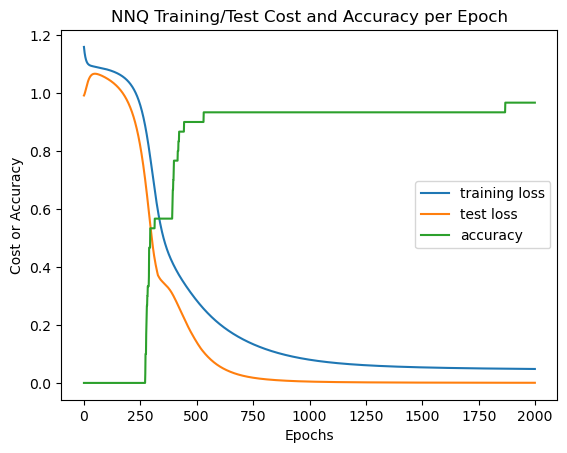

In [14]:
#plot the model performance on training set and test set
plt.plot(training_costs,label='training loss')
plt.plot(test_losses,label='test loss')
plt.plot(acc_per_epoch,label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Cost or Accuracy')
plt.rcParams['figure.figsize'] = [10, 10]
plt.legend()
plt.title('NNQ Training/Test Cost and Accuracy per Epoch')
plt.show()

In [15]:
#Reasons test loss could be lower than training loss:
#1. regularization not applied during testing (Dropout is turned off)
#2. time of measurement: test loss is measured after each epoch. training loss is the 
# average for the epoch
#3. the testing dataset may actually be simpler than the training data
#4 There is some error in how I am calculating the loss (actually this is why) 

In [16]:
#examples of some predictions
ypreds[:5].round().astype(np.int64)

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [17]:
#compare the above to the true labels here
y_test[:5]

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

In [18]:
#save the model
net.save('iris_classification_model.json')

In [19]:
#create a new Network object and load the architecture and weights of the first model
net2 = Network()
net2.load('iris_classification_model.json')

In [20]:
#net2 loaded from the file has the same structure and weights as the model we trained earlier
net2.info()

Network Architecture
Layer   - Inputs: 4, Outputs: 20, Activation: ReLU
Dropout - p = (0.4)
Layer   - Inputs: 20, Outputs: 10, Activation: ReLU
Dropout - p = (0.4)
Layer   - Inputs: 10, Outputs: 10, Activation: ReLU
Dropout - p = (0.4)
Layer   - Inputs: 10, Outputs: 3, Activation: SoftMax
Cost Function: CrossEntropy

Settings
lr=0.001 batch_size=10 optimizer=No


In [ ]:
#NNQ can be used on binary classification problems and regression problems. 